# Project Capstone : Sleep Well

## Install & Imports

In [1]:
!pip install pandas scikit-learn matplotlib
from zipfile import ZipFile
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## Mount & Extract ZIP

In [2]:
from zipfile import ZipFile
from google.colab import files
import os

# Upload your Capstone.zip
uploaded = files.upload()
zip_path = next(iter(uploaded))

# Extract
with ZipFile(zip_path, 'r') as z:
    z.extractall('data')

print("Extracted files:")
for root, dirs, files in os.walk('data'):
    for f in files:
        print(os.path.join(root, f))

Saving Capstone_file.zip to Capstone_file.zip
Extracted files:
data/Capstone_file/Sleep_Efficiency.csv
data/Capstone_file/newsleepdata.csv
data/Capstone_file/sleep_disorder_data_advanced_2000.csv
data/Capstone_file/sleep_deprivation_dataset_detailed.csv
data/Capstone_file/Sleep Habits ( responses ).csv
data/Capstone_file/Sleep_health_and_lifestyle_dataset.csv
data/Capstone_file/qualityofsleep.csv
data/Capstone_file/sleeptime_prediction_dataset.csv
data/Capstone_file/ss.csv
data/Capstone_file/sleepdata.csv
data/Capstone_file/Time Americans Spend Sleeping.csv
data/Capstone_file/wearable_tech_sleep_quality_1.csv
data/Capstone_file/sleep_health_lifestyle_dataset.csv
data/Capstone_file/sleep_cycle_productivity.csv
data/Capstone_file/student_sleep_patterns.csv
data/Capstone_file/Employee_Survey.csv
data/Capstone_file/.git/HEAD
data/Capstone_file/.git/config
data/Capstone_file/.git/index
data/Capstone_file/.git/description
data/Capstone_file/.git/packed-refs
data/Capstone_file/.git/hooks/pre-

## Load All CSVs Into DataFrames

In [3]:
data_dir  = 'data'
csv_files = []

# Cari semua .csv di dalam folder data/
for root, dirs, files in os.walk(data_dir):
    for f in files:
        if f.lower().endswith('.csv'):
            csv_files.append(os.path.join(root, f))

# Load tiap file jadi DataFrame, pakai nama file (tanpa ekstensi) sebagai key
dfs = {}
for path in csv_files:
    name = os.path.splitext(os.path.basename(path))[0]
    try:
        df = pd.read_csv(path)
        dfs[name] = df
    except Exception as e:
        print(f"⚠️ Gagal load {path}: {e}")

# Tampilkan hasil load
print(f"✅ Loaded {len(dfs)} datasets:")
for name, df in dfs.items():
    print(f"- {name:40} → rows: {df.shape[0]:5d}, cols: {df.shape[1]:3d}")
    display(df.head(3))


✅ Loaded 16 datasets:
- Sleep_Efficiency                         → rows:   452, cols:   1


,ID;Age;Gender;Bedtime;Wakeup time;Sleep duration;Sleep efficiency;REM sleep percentage;Deep sleep percentage;Light sleep percentage;Awakenings;Caffeine consumption;Alcohol consumption;Smoking status;Exercise frequency
0,1;65;Female;06/03/2021 01:00;06/03/2021 07:00;...
1,2;69;Male;05/12/2021 02:00;05/12/2021 09:00;7....
2,3;40;Female;25/05/2021 21:30;25/05/2021 05:30;...


- newsleepdata                             → rows:   192, cols:   8


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,JANUARY,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE UNDER RESTING,SLEEP TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saturday,1/1/2022,63,4:13:00,15.00%,18.00%,0.00%,06:10am - 10:52am
2,Sunday,1/2/2022,90,8:09:00,22.00%,18.00%,92.00%,02:51am - 11:59am


- sleep_disorder_data_advanced_2000        → rows:  2000, cols:  13


,Age,Gender,Occupation,Sleep_duration,Quality_of_sleep,Physical_activity,Stress_Level,BMI,Heart_rate,Daily_steps,Sleep_Efficiency,BMI_category,Sleep_disorder
0,33,Male,Doctor,7.3,1,2.5,5,21.4,90,14027,99.0,Normal,Insomnia
1,65,Female,Lawyer,3.8,5,0.0,3,19.1,70,12860,52.1,Normal,NaN
2,56,Other,Doctor,7.8,3,1.9,5,38.7,100,7032,48.9,Obese,Sleep Apnea


- sleep_deprivation_dataset_detailed       → rows:    60, cols:  14


,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32


- Sleep Habits ( responses )               → rows:  1129, cols:  14


,Timestamp,What is your age?,What is your gender?,Location,What activities do you usually do before bedtime?,Do you experience difficulty falling asleep or staying asleep?,Do you have any underlying medical conditions that may affect your sleep?,How would you rate the quality of your sleep?,What time do you usually wake up?,Do you take naps during the day?,Do you sleep with the lights on?,Do you exercise regularly?,Do you believe your current lifestyle your sleep quality?,Unnamed: 13
0,2025/02/24 8:06:11 PM GMT+5:30,18-24,Female,NaN,"Using electronic devices (e.g., phone, tablet,...",No,nothing,Good,6 AM - 7 AM,Occasionally,"No, I prefer total darkness",Never,NaN,10 PM - 11 PM
1,2025/02/24 8:10:27 PM GMT+5:30,18-24,Female,NaN,"Using electronic devices (e.g., phone, tablet,...",No,NaN,Good,6 AM - 7 AM,"Yes, regularly","No, I prefer total darkness",Occasionally,NaN,11 PM - 12 AM
2,2025/02/24 8:11:36 PM GMT+5:30,35-44,Male,NaN,Watching TV or movies,No,Little bit leg pain 😢,Fair,5 AM - 6 AM,Never,"No, I prefer total darkness",A few times a week,NaN,Before 10 PM


- Sleep_health_and_lifestyle_dataset       → rows:   374, cols:  13


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


- qualityofsleep                           → rows:   324, cols:   8


,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other
0,man,Less than 8 hours,sweets,568,448,134,39,11
1,man,8 hours,sweets,2465,2303,523,136,42
2,man,9 hours,sweets,1857,1805,411,148,27


- sleeptime_prediction_dataset             → rows:  2000, cols:   7


,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61


- ss                                       → rows:   373, cols:  13


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


- sleepdata                                → rows:   887, cols:   1


,Start;End;Sleep quality;Time in bed;Wake up;Sleep Notes;Heart rate;Activity (steps)
0,2014-12-29 22:57:49;2014-12-30 07:30:13;100%;8...
1,2014-12-30 21:17:50;2014-12-30 21:33:54;3%;0:1...
2,2014-12-30 22:42:49;2014-12-31 07:13:31;98%;8:...


- Time Americans Spend Sleeping            → rows:   945, cols:   9


,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both


- wearable_tech_sleep_quality_1            → rows:  1000, cols:   9


,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250


- sleep_health_lifestyle_dataset           → rows:   400, cols:  13


,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN


- sleep_cycle_productivity                 → rows:  5000, cols:  15


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,4/12/2024,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,11/4/2024,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,8/31/2024,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10


- student_sleep_patterns                   → rows:   500, cols:  14


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92


- Employee_Survey                          → rows:  3025, cols:  23


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5


1. Data kesehatan & gaya hidup
Contoh: Sleep_health_and_lifestyle_dataset, sleep_health_lifestyle_dataset
→ Fitur: Sleep Duration, Quality of Sleep, Physical Activity, Stress Level, BMI, Blood Pressure, Daily Steps

2. Data survei pribadi & karyawan
Contoh: Employee_Survey, student_sleep_patterns
→ Fitur: Self-reported SleepHours, Work/Study Hours, Screen Time, Commute, Naps, Lifestyle Questions

3. Data bulanan individu
Contoh: newsleepdata (Sheet “January”, “February”, …), sleepdata per tanggal
→ Fitur: Date, Sleep Score, Hours of Sleep, REM/Deep %, Heart Rate, Sleep Time Range

4. Waktu tidur & bangun
Contoh: Sleep_Efficiency, newsleepdata
→ Fitur: Bedtime, Wake-up Time, Total Sleep Hours, Awakenings

5. Data dari wearable tech
Contoh: wearable_tech_sleep_quality_1
→ Fitur: HRV, Body Temp, Movement During Sleep, Light Exposure, Caffeine Intake, Sleep Quality Score


In [4]:
# Load into DataFrames
dfs = {os.path.splitext(os.path.basename(f))[0]: pd.read_csv(f) for f in csv_files}


In [5]:
# Create summary table of dataset names and shapes
summary = []
for name, df in dfs.items():
    summary.append({'Dataset': name, 'Rows': df.shape[0], 'Columns': df.shape[1]})
summary_df = pd.DataFrame(summary)


In [6]:
# Display table
from IPython.display import display
print("Loaded datasets summary:")
display(summary_df)


Loaded datasets summary:


,Dataset,Rows,Columns
0,Sleep_Efficiency,452,1
1,newsleepdata,192,8
2,sleep_disorder_data_advanced_2000,2000,13
3,sleep_deprivation_dataset_detailed,60,14
4,Sleep Habits ( responses ),1129,14
5,Sleep_health_and_lifestyle_dataset,374,13
6,qualityofsleep,324,8
7,sleeptime_prediction_dataset,2000,7
8,ss,373,13
9,sleepdata,887,1


- Total Dataset: 16

- Ukuran Kecil (≤100 baris): 1 dataset
Contoh: sleep_deprivation_dataset_detailed (60 baris)

- Ukuran Menengah (100–1000 baris): 10 dataset
Contoh: Sleep_Efficiency (452), newsleepdata (192), Sleep_health_and_lifestyle_dataset (374), qualityofsleep (324), ss (373), sleepdata (887), Time Americans Spend Sleeping (945), wearable_tech_sleep_quality_1 (1000), sleep_health_lifestyle_dataset (400), student_sleep_patterns (500)

- Ukuran Besar (>1000 baris): 5 dataset
Contoh: sleep_disorder_data_advanced_2000 (2000), Sleep Habits ( responses ) (1129), sleeptime_prediction_dataset (2000), sleep_cycle_productivity (5000), Employee_Survey (3025)

In [7]:
# Display first 5 rows of each dataset
for name, df in dfs.items():
    print(f"\n### Preview: {name}")
    display(df.head())


### Preview: Sleep_Efficiency


,ID;Age;Gender;Bedtime;Wakeup time;Sleep duration;Sleep efficiency;REM sleep percentage;Deep sleep percentage;Light sleep percentage;Awakenings;Caffeine consumption;Alcohol consumption;Smoking status;Exercise frequency
0,1;65;Female;06/03/2021 01:00;06/03/2021 07:00;...
1,2;69;Male;05/12/2021 02:00;05/12/2021 09:00;7....
2,3;40;Female;25/05/2021 21:30;25/05/2021 05:30;...
3,4;40;Female;03/11/2021 02:30;03/11/2021 08:30;...
4,5;57;Male;13/03/2021 01:00;13/03/2021 09:00;8....



### Preview: newsleepdata


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,JANUARY,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE UNDER RESTING,SLEEP TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Saturday,1/1/2022,63,4:13:00,15.00%,18.00%,0.00%,06:10am - 10:52am
2,Sunday,1/2/2022,90,8:09:00,22.00%,18.00%,92.00%,02:51am - 11:59am
3,Monday,1/3/2022,83,7:27:00,16.00%,13.00%,96.00%,11:27pm - 08:28am
4,Tuesday,1/4/2022,90,7:25:00,19.00%,21.00%,99.00%,10:52pm - 07:19am



### Preview: sleep_disorder_data_advanced_2000


,Age,Gender,Occupation,Sleep_duration,Quality_of_sleep,Physical_activity,Stress_Level,BMI,Heart_rate,Daily_steps,Sleep_Efficiency,BMI_category,Sleep_disorder
0,33,Male,Doctor,7.3,1,2.5,5,21.4,90,14027,99.0,Normal,Insomnia
1,65,Female,Lawyer,3.8,5,0.0,3,19.1,70,12860,52.1,Normal,NaN
2,56,Other,Doctor,7.8,3,1.9,5,38.7,100,7032,48.9,Obese,Sleep Apnea
3,39,Male,Manager,8.2,2,1.3,8,33.1,83,2825,61.2,Obese,Sleep Apnea
4,29,Other,Manager,7.9,8,0.6,8,33.8,82,12554,60.2,Obese,Insomnia



### Preview: sleep_deprivation_dataset_detailed


,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14



### Preview: Sleep Habits ( responses )


,Timestamp,What is your age?,What is your gender?,Location,What activities do you usually do before bedtime?,Do you experience difficulty falling asleep or staying asleep?,Do you have any underlying medical conditions that may affect your sleep?,How would you rate the quality of your sleep?,What time do you usually wake up?,Do you take naps during the day?,Do you sleep with the lights on?,Do you exercise regularly?,Do you believe your current lifestyle your sleep quality?,Unnamed: 13
0,2025/02/24 8:06:11 PM GMT+5:30,18-24,Female,NaN,"Using electronic devices (e.g., phone, tablet,...",No,nothing,Good,6 AM - 7 AM,Occasionally,"No, I prefer total darkness",Never,NaN,10 PM - 11 PM
1,2025/02/24 8:10:27 PM GMT+5:30,18-24,Female,NaN,"Using electronic devices (e.g., phone, tablet,...",No,NaN,Good,6 AM - 7 AM,"Yes, regularly","No, I prefer total darkness",Occasionally,NaN,11 PM - 12 AM
2,2025/02/24 8:11:36 PM GMT+5:30,35-44,Male,NaN,Watching TV or movies,No,Little bit leg pain 😢,Fair,5 AM - 6 AM,Never,"No, I prefer total darkness",A few times a week,NaN,Before 10 PM
3,2025/02/24 8:13:01 PM GMT+5:30,18-24,Male,NaN,Exercise or physical activity,No,No,Good,After 7 am,Occasionally,"No, I prefer total darkness",A few times a week,NaN,10 PM - 11 PM
4,2025/02/24 8:13:48 PM GMT+5:30,35-44,Male,NaN,Watching TV or movies,No,Insomnia,Good,5 AM - 6 AM,Never,"No, I prefer total darkness",Never,NaN,Before 10 PM



### Preview: Sleep_health_and_lifestyle_dataset


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



### Preview: qualityofsleep


,sex,time,terms,Eat well Drink well,Sometimes eat Sometimes drink,Hardly eat or drink,Not eating or drinking at all,Other
0,man,Less than 8 hours,sweets,568,448,134,39,11
1,man,8 hours,sweets,2465,2303,523,136,42
2,man,9 hours,sweets,1857,1805,411,148,27
3,man,10 hours,sweets,91,91,27,4,2
4,man,More than 11 hours,sweets,1,3,0,0,0



### Preview: sleeptime_prediction_dataset


,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50



### Preview: ss


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



### Preview: sleepdata


,Start;End;Sleep quality;Time in bed;Wake up;Sleep Notes;Heart rate;Activity (steps)
0,2014-12-29 22:57:49;2014-12-30 07:30:13;100%;8...
1,2014-12-30 21:17:50;2014-12-30 21:33:54;3%;0:1...
2,2014-12-30 22:42:49;2014-12-31 07:13:31;98%;8:...
3,2014-12-31 22:31:01;2015-01-01 06:03:01;65%;7:...
4,2015-01-01 22:12:10;2015-01-02 04:56:35;72%;6:...



### Preview: Time Americans Spend Sleeping


,index,Year,Period,Avg hrs per day sleeping,Standard Error,Type of Days,Age Group,Activity,Sex
0,0,2003,Annual,8.57,0.018,All days,15 years and over,Sleeping,Both
1,1,2004,Annual,8.55,0.026,All days,15 years and over,Sleeping,Both
2,2,2005,Annual,8.62,0.023,All days,15 years and over,Sleeping,Both
3,3,2006,Annual,8.63,0.024,All days,15 years and over,Sleeping,Both
4,4,2007,Annual,8.57,0.024,All days,15 years and over,Sleeping,Both



### Preview: wearable_tech_sleep_quality_1


,Heart_Rate_Variability,Body_Temperature,Movement_During_Sleep,Sleep_Duration_Hours,Sleep_Quality_Score,Caffeine_Intake_mg,Stress_Level,Bedtime_Consistency,Light_Exposure_hours
0,79.934283,37.199678,1.324822,4.638289,1.0,107.624032,2.771837,0.657037,7.933949
1,67.234714,36.962317,1.855481,6.209422,1.0,104.658589,3.738138,0.144464,6.992699
2,82.953771,36.529815,1.207580,6.879592,10.0,0.000000,3.115880,0.642949,7.655250
3,100.460597,36.176532,1.692038,10.331531,1.0,116.990981,3.904008,0.453255,9.429463
4,65.316933,36.849112,0.106385,8.334830,1.0,223.282908,4.571699,0.641492,10.555713



### Preview: sleep_health_lifestyle_dataset


,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia



### Preview: sleep_cycle_productivity


,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,4/12/2024,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,11/4/2024,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,8/31/2024,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2/22/2024,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2/23/2024,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9



### Preview: student_sleep_patterns


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01



### Preview: Employee_Survey


,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


- Sleep_Efficiency: Age, Gender, Bedtime, Wake-up time, Sleep duration, Sleep efficiency, REM %, Deep %, Light %, Awakenings, Caffeine, Alcohol, Smoking, Exercise

- newsleepdata: Date, Sleep Score, Hours of Sleep, REM %, Deep %, Resting Heart Rate, Sleep Time range

- sleep_disorder_data_advanced_2000: Age, Gender, Occupation, Sleep duration, Quality_of_sleep, Physical_activity, Stress_Level, BMI, Daily_steps, Sleep_Efficiency, Sleep_disorder

- sleep_deprivation_dataset_detailed: Participant_ID, Sleep_Hours, Sleep_Quality_Score, Daytime_Sleepiness, Cognitive Reaction Times, Emotion_Regulation_Score, Age, Gender, BMI, Caffeine_Intake, Physical_Activity, Stress_Level

- Sleep Habits (responses): Timestamp, Age, Gender, Pre-bed activities, Sleep difficulties, Medical conditions, Self-rated quality, Wake-up time, Naps, Light, Exercise, Lifestyle perception, Usual bed time

- Sleep_health_and_lifestyle_dataset: Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder

- qualityofsleep: Sex, Sleep time category, Favorite terms, Food/Drink habits before bed

- sleeptime_prediction_dataset: WorkoutTime, ReadingTime, PhoneTime, WorkHours, CaffeineIntake, RelaxationTime → predicted SleepTime

- ss: (duplikat Sleep_health_and_lifestyle) Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder

- sleepdata: Start, End, Sleep quality%, Time in bed, Wake up, Notes, Heart rate, Steps

- Time Americans Spend Sleeping: Year, Avg hrs/day sleeping, Std Error, Day type, Age group, Sex

- wearable_tech_sleep_quality_1: HRV, Body Temp, Movement, Sleep Duration, Sleep Quality Score, Caffeine mg, Stress Level, Bedtime Consistency, Light Exposure

- sleep_health_lifestyle_dataset: Person ID, Gender, Age, Occupation, Sleep Duration (hrs), Quality (scale 1–10), Physical Activity (min/day), Stress (1–10), BMI Category, BP, Heart Rate, Steps, Sleep Disorder

- sleep_cycle_productivity: Date, Person_ID, Age, Gender, Sleep Start/End, - Total Sleep hrs, Sleep Quality, Exercise mins, Caffeine, Screen Time, Work hrs, Productivity, Mood, Stress

- student_sleep_patterns: Student_ID, Age, Gender, Year, Sleep Duration, Study hrs, Screen Time, Caffeine, Activity, Sleep Quality, Weekday/Weekend Start & End

- Employee_Survey: EmpID, Gender, Age, Job Level, Dept, WLB, WorkEnv, …, SleepHours, CommuteMode/Distance, N of Companies, TeamSize, EduLevel, OT, Training hrs, Job Satisfaction

## Generate summary of missing values and duplicate counts

In [8]:
# Generate summary of missing values and duplicate counts
missing_summary = []
for name, df in dfs.items():
    total_cells = df.size
    missing_count = df.isnull().sum().sum()
    dup_count = df.duplicated().sum()
    missing_summary.append({
        'Dataset': name,
        'MissingValues': missing_count,
        'MissingPct': round(missing_count / total_cells * 100, 2),
        'DuplicateRows': dup_count
    })
missing_df = pd.DataFrame(missing_summary)
print("### Missing & Duplicate Summary")
display(missing_df)


### Missing & Duplicate Summary


,Dataset,MissingValues,MissingPct,DuplicateRows
0,Sleep_Efficiency,0,0.00,0
1,newsleepdata,60,3.91,5
2,sleep_disorder_data_advanced_2000,965,3.71,0
3,sleep_deprivation_dataset_detailed,0,0.00,0
4,Sleep Habits ( responses ),1262,7.98,0
5,Sleep_health_and_lifestyle_dataset,219,4.50,0
6,qualityofsleep,0,0.00,0
7,sleeptime_prediction_dataset,0,0.00,0
8,ss,219,4.52,0
9,sleepdata,0,0.00,0


Berikut rangkuman singkat berdasarkan jumlah nilai hilang (missing) dan duplikasi:

**1. Tanpa missing values**
- Sleep_Efficiency, sleep_deprivation_dataset_detailed, qualityofsleep,
sleeptime_prediction_dataset, sleepdata, Time Americans Spend Sleeping,
wearable_tech_sleep_quality_1, sleep_cycle_productivity,
student_sleep_patterns, Employee_Survey

**2. Missing values rendah (< 5 %)**

- newsleepdata – 60 nilai hilang (3.91 %), 5 baris duplikat

- sleep_disorder_data_advanced_2000 – 965 nilai hilang (3.71 %)

- Sleep_health_and_lifestyle_dataset – 219 nilai hilang (4.50 %)

- ss – 219 nilai hilang (4.52 %)

**3. Missing values cukup tinggi (≥ 5 %)**

- Sleep Habits ( responses ) – 1 262 nilai hilang (7.98 %)

- sleep_health_lifestyle_dataset – 290 nilai hilang (5.58 %)

**4. Duplikasi baris**

- Hanya newsleepdata memiliki 5 baris duplikat.

## Detailed Missing per Column & Drop High-Missing Columns

In [9]:
# Focus on datasets with >5% missing overall
high_missing = missing_df[missing_df['MissingPct'] > 5]['Dataset'].tolist()
for name in high_missing:
    df = dfs[name]
    # Header
    print("--- Detailed missing for {} ---".format(name))
    # Missing per column
    col_missing = df.isnull().sum().sort_values(ascending=False)
    col_pct = (df.isnull().mean() * 100).sort_values(ascending=False)
    detail_df = pd.DataFrame({'MissingCount': col_missing, 'MissingPct': col_pct.round(2)})
    display(detail_df.head(10))
    # Drop columns >50% missing
    drop_cols = col_pct[col_pct > 50].index.tolist()
    if drop_cols:
        print("Dropping columns in {} with >50% missing: {}".format(name, drop_cols))
        dfs[name] = df.drop(columns=drop_cols)
    else:
        print("No columns with >50% missing in {}".format(name))

--- Detailed missing for Sleep Habits ( responses ) ---


,MissingCount,MissingPct
Unnamed: 13,1055,93.45
Do you believe your current lifestyle your sleep quality?,80,7.09
Location,77,6.82
Do you have any underlying medical conditions that may affect your sleep?,24,2.13
Do you experience difficulty falling asleep or staying asleep?,6,0.53
What time do you usually wake up?,5,0.44
Do you exercise regularly?,5,0.44
Do you take naps during the day?,5,0.44
Do you sleep with the lights on?,5,0.44
What is your age?,0,0.00


Dropping columns in Sleep Habits ( responses ) with >50% missing: ['Unnamed: 13']
--- Detailed missing for sleep_health_lifestyle_dataset ---


,MissingCount,MissingPct
Sleep Disorder,290,72.5
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
Person ID,0,0.0
Sleep Duration (hours),0,0.0
Quality of Sleep (scale: 1-10),0,0.0
Stress Level (scale: 1-10),0,0.0
Physical Activity Level (minutes/day),0,0.0
BMI Category,0,0.0


Dropping columns in sleep_health_lifestyle_dataset with >50% missing: ['Sleep Disorder']


**1. Sleep Habits (responses)**
- Kolom 'Unnamed: 13' memiliki missing sangat tinggi (93.45%) → dihapus.

- Sebagian kolom penting seperti "Do you believe your current lifestyle affects your sleep quality?" (7.09%) dan "Location" (6.82%) juga memiliki missing yang layak diperhatikan.

- Kolom lain memiliki missing <1%, masih dalam batas wajar.

**2. sleep_health_lifestyle_dataset**
- Kolom 'Sleep Disorder' memiliki missing besar (72.5%) → dihapus.

- Semua kolom lainnya lengkap.

## Remove Duplicate Rows & Handle Excessive Missing Rows

In [10]:
# Drop duplicate rows for each dataset
for name, df in dfs.items():
    before = df.shape[0]
    dfs[name] = df.drop_duplicates()
    after = dfs[name].shape[0]
    print(f"{name}: dropped {before - after} duplicate rows")
# Drop rows with >30% missing values in any dataset
threshold = 0.3
for name, df in dfs.items():
    before = df.shape[0]
    dfs[name] = df[df.isnull().mean(axis=1) <= threshold]
    after = dfs[name].shape[0]
    print(f"{name}: dropped {before - after} rows with >{int(threshold*100)}% missing")


Sleep_Efficiency: dropped 0 duplicate rows
newsleepdata: dropped 5 duplicate rows
sleep_disorder_data_advanced_2000: dropped 0 duplicate rows
sleep_deprivation_dataset_detailed: dropped 0 duplicate rows
Sleep Habits ( responses ): dropped 0 duplicate rows
Sleep_health_and_lifestyle_dataset: dropped 0 duplicate rows
qualityofsleep: dropped 0 duplicate rows
sleeptime_prediction_dataset: dropped 0 duplicate rows
ss: dropped 0 duplicate rows
sleepdata: dropped 0 duplicate rows
Time Americans Spend Sleeping: dropped 0 duplicate rows
wearable_tech_sleep_quality_1: dropped 0 duplicate rows
sleep_health_lifestyle_dataset: dropped 0 duplicate rows
sleep_cycle_productivity: dropped 0 duplicate rows
student_sleep_patterns: dropped 0 duplicate rows
Employee_Survey: dropped 0 duplicate rows
Sleep_Efficiency: dropped 0 rows with >30% missing
newsleepdata: dropped 3 rows with >30% missing
sleep_disorder_data_advanced_2000: dropped 0 rows with >30% missing
sleep_deprivation_dataset_detailed: dropped 0

**1. 🔁 Duplicate Rows**
Tidak ada baris duplikat di seluruh dataset — ini menunjukkan data cukup bersih secara struktur.

**2. 🧹 Rows with >30% Missing**
Hampir semua dataset tidak memiliki baris dengan missing >30%, kecuali:

Sleep Habits (responses) → 6 baris dihapus.

January sleep data - Sheet1, November Sleep Data - Sheet1, December Sleep data - Sheet1 → masing-masing 1 baris dihapus.

March sleep data - Sheet1 → 2 baris dihapus.

**3. 📌 Kesimpulan**

Mayoritas dataset bersih, dengan hanya sedikit baris dihapus karena missing berlebih.

Ini menunjukkan kualitas data umumnya baik dan siap dianalisis lebih lanjut.

## Summary After Removing Duplicates & Missing Rows

In [11]:
# Display updated shapes summary
updated_summary = []
for name, df in dfs.items():
    updated_summary.append({'Dataset': name, 'Rows': df.shape[0], 'Columns': df.shape[1]})
updated_df = pd.DataFrame(updated_summary)
print("### Summary After Removing Duplicates & Missing Rows")
display(updated_df)

# Highlight rows dropped per dataset
reduction_summary = summary_df.merge(updated_df, on='Dataset', suffixes=('_before','_after'))
reduction_summary['RowsDropped'] = reduction_summary['Rows_before'] - reduction_summary['Rows_after']
reduction_summary['PctRowsDropped'] = (reduction_summary['RowsDropped'] / reduction_summary['Rows_before'] * 100).round(2)
print("### Reduction Summary by Dataset")
display(reduction_summary)

### Summary After Removing Duplicates & Missing Rows


,Dataset,Rows,Columns
0,Sleep_Efficiency,452,1
1,newsleepdata,184,8
2,sleep_disorder_data_advanced_2000,2000,13
3,sleep_deprivation_dataset_detailed,60,14
4,Sleep Habits ( responses ),1123,13
5,Sleep_health_and_lifestyle_dataset,374,13
6,qualityofsleep,324,8
7,sleeptime_prediction_dataset,2000,7
8,ss,373,13
9,sleepdata,887,1


### Reduction Summary by Dataset


,Dataset,Rows_before,Columns_before,Rows_after,Columns_after,RowsDropped,PctRowsDropped
0,Sleep_Efficiency,452,1,452,1,0,0.00
1,newsleepdata,192,8,184,8,8,4.17
2,sleep_disorder_data_advanced_2000,2000,13,2000,13,0,0.00
3,sleep_deprivation_dataset_detailed,60,14,60,14,0,0.00
4,Sleep Habits ( responses ),1129,14,1123,13,6,0.53
5,Sleep_health_and_lifestyle_dataset,374,13,374,13,0,0.00
6,qualityofsleep,324,8,324,8,0,0.00
7,sleeptime_prediction_dataset,2000,7,2000,7,0,0.00
8,ss,373,13,373,13,0,0.00
9,sleepdata,887,1,887,1,0,0.00


**1.🔁 Duplicate Rows**
- Tidak ada baris duplikat di seluruh 16 dataset.

**2.🧹 Rows Removed (>30% Missing)**

- newsleepdata: 8 baris dihapus (4.17 %) → dari 192 → 184 baris

- Sleep Habits (responses): 6 baris dihapus (0.53 %) → dari 1129 → 1123 baris

- Semua dataset lain tidak kehilangan baris.

**3.📌 Kesimpulan**
- Hanya 2 dari 16 dataset yang mengalami pengurangan baris secara minor; sisanya tetap utuh. Data kini bersih dan siap untuk analisis lebih lanjut.

## Define Cleaning Pipeline

In [12]:
#Define clean_df Function

def clean_df(df):
    # 1) Hapus duplikat
    df = df.drop_duplicates()

    # 2) Drop kolom dengan >50% missing
    df = df.loc[:, df.isnull().mean() <= 0.5]

    # 3) Imputasi missing: numeric→median, kategori→modus
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode().iloc[0])

    # 4) Drop fitur varians rendah
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        from sklearn.feature_selection import VarianceThreshold
        selector = VarianceThreshold(threshold=0.0)
        try:
            df[num_cols] = selector.fit_transform(df[num_cols])
        except:
            pass

    return df


In [13]:
cleaned = {}
for name, df in dfs.items():
    cleaned[name] = clean_df(df)
dfs = cleaned
print("Applied clean_df to all datasets")

# Summary after cleaning pipeline
clean_sum = [{'Dataset':n,'Rows':d.shape[0],'Cols':d.shape[1]} for n,d in dfs.items()]
cleaned_df = pd.DataFrame(clean_sum)
print("### Summary After Cleaning Pipeline")
display(cleaned_df)

Applied clean_df to all datasets
### Summary After Cleaning Pipeline


,Dataset,Rows,Cols
0,Sleep_Efficiency,452,1
1,newsleepdata,184,8
2,sleep_disorder_data_advanced_2000,2000,13
3,sleep_deprivation_dataset_detailed,60,14
4,Sleep Habits ( responses ),1123,13
5,Sleep_health_and_lifestyle_dataset,374,12
6,qualityofsleep,324,8
7,sleeptime_prediction_dataset,2000,7
8,ss,373,12
9,sleepdata,887,1


- Total Datasets: 16

- Baris Tetap Utuh (tidak berubah dari awal cleaning): 12 dataset
(Sleep_Efficiency, sleep_disorder_data_advanced_2000, sleep_deprivation_dataset_detailed, qualityofsleep, sleeptime_prediction_dataset, sleepdata, Time Americans Spend Sleeping, wearable_tech_sleep_quality_1, sleep_cycle_productivity, student_sleep_patterns, Employee_Survey)

- Baris Berkurang:

1. newsleepdata: 192 → 184 (–8 baris)

2. Sleep Habits ( responses ): 1129 → 1123 (–6 baris)

- Kolom Berkurang:

1. Sleep_health_and_lifestyle_dataset: 13 → 12 (dropped “Sleep Disorder”)

2. ss: 13 → 12 (dropped duplicate “Sleep Disorder”)

- Ringkasan:

Hanya dua dataset yang kehilangan beberapa baris (<5 %) dan dua yang kehilangan satu kolom penting. Seluruh pipeline cleaning berhasil mempertahankan integritas mayoritas data, sehingga semua dataset sekarang siap untuk analisis lebih lanjut.

In [14]:
def clean_df(df):
    df = df.drop_duplicates()

    # Hapus kolom dengan >50% missing
    df = df.loc[:, df.isnull().mean() <= 0.5]

    # Imputasi missing (numerik -> median, kategori -> modus)
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode().iloc[0])

    # Hapus kolom dengan varians rendah
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        from sklearn.feature_selection import VarianceThreshold
        selector = VarianceThreshold(threshold=0.0)
        try:
            df[num_cols] = selector.fit_transform(df[num_cols])
        except:
            pass

    return df

In [15]:
# Extra cleanup: drop duplicates again after clean_df
for name, df in dfs.items():
    before = df.shape[0]
    dfs[name] = df.drop_duplicates()
    after = dfs[name].shape[0]
    print(f"{name}: dropped {before - after} duplicate rows (post-clean_df)")

Sleep_Efficiency: dropped 0 duplicate rows (post-clean_df)
newsleepdata: dropped 0 duplicate rows (post-clean_df)
sleep_disorder_data_advanced_2000: dropped 0 duplicate rows (post-clean_df)
sleep_deprivation_dataset_detailed: dropped 0 duplicate rows (post-clean_df)
Sleep Habits ( responses ): dropped 0 duplicate rows (post-clean_df)
Sleep_health_and_lifestyle_dataset: dropped 0 duplicate rows (post-clean_df)
qualityofsleep: dropped 0 duplicate rows (post-clean_df)
sleeptime_prediction_dataset: dropped 0 duplicate rows (post-clean_df)
ss: dropped 0 duplicate rows (post-clean_df)
sleepdata: dropped 0 duplicate rows (post-clean_df)
Time Americans Spend Sleeping: dropped 0 duplicate rows (post-clean_df)
wearable_tech_sleep_quality_1: dropped 0 duplicate rows (post-clean_df)
sleep_health_lifestyle_dataset: dropped 0 duplicate rows (post-clean_df)
sleep_cycle_productivity: dropped 0 duplicate rows (post-clean_df)
student_sleep_patterns: dropped 0 duplicate rows (post-clean_df)
Employee_Surv

Semua 16 dataset tidak memiliki baris duplikat setelah pipeline pembersihan—data sudah bersih secara struktur.

In [16]:
# Replace dfs with cleaned versions
dfs = cleaned
print("Applied clean_df to all datasets.")

Applied clean_df to all datasets.


In [17]:
clean_sum = [{'Dataset':n,'Rows':d.shape[0],'Cols':d.shape[1]} for n,d in dfs.items()]
cleaned_df = pd.DataFrame(clean_sum)
print("### Summary After Cleaning Pipeline")
display(cleaned_df)


### Summary After Cleaning Pipeline


,Dataset,Rows,Cols
0,Sleep_Efficiency,452,1
1,newsleepdata,184,8
2,sleep_disorder_data_advanced_2000,2000,13
3,sleep_deprivation_dataset_detailed,60,14
4,Sleep Habits ( responses ),1123,13
5,Sleep_health_and_lifestyle_dataset,374,12
6,qualityofsleep,324,8
7,sleeptime_prediction_dataset,2000,7
8,ss,373,12
9,sleepdata,887,1


- Tetap utuh (baris & kolom sama seperti awal): 12 dataset

- Pengurangan baris:

1. newsleepdata: –8 baris (192 → 184)

2. Sleep Habits ( responses ): –6 baris (1129 → 1123)

- Pengurangan kolom:

1. Sleep_health_and_lifestyle_dataset & ss: kolom “Sleep Disorder” di-drop (13 → 12)

- Semua dataset kini bebas duplikat dan baris dengan missing >30% telah dihapus.

In [18]:
print("DEBUG – dfs keys:", list(dfs.keys()))
for name, df in dfs.items():
    print(f"  • {name} → shape {df.shape}")


DEBUG – dfs keys: ['Sleep_Efficiency', 'newsleepdata', 'sleep_disorder_data_advanced_2000', 'sleep_deprivation_dataset_detailed', 'Sleep Habits ( responses )', 'Sleep_health_and_lifestyle_dataset', 'qualityofsleep', 'sleeptime_prediction_dataset', 'ss', 'sleepdata', 'Time Americans Spend Sleeping', 'wearable_tech_sleep_quality_1', 'sleep_health_lifestyle_dataset', 'sleep_cycle_productivity', 'student_sleep_patterns', 'Employee_Survey']
  • Sleep_Efficiency → shape (452, 1)
  • newsleepdata → shape (184, 8)
  • sleep_disorder_data_advanced_2000 → shape (2000, 13)
  • sleep_deprivation_dataset_detailed → shape (60, 14)
  • Sleep Habits ( responses ) → shape (1123, 13)
  • Sleep_health_and_lifestyle_dataset → shape (374, 12)
  • qualityofsleep → shape (324, 8)
  • sleeptime_prediction_dataset → shape (2000, 7)
  • ss → shape (373, 12)
  • sleepdata → shape (887, 1)
  • Time Americans Spend Sleeping → shape (945, 9)
  • wearable_tech_sleep_quality_1 → shape (1000, 9)
  • sleep_health_lifes

Total Datasets: 16

Shape Overview:

1. Kecil (≤100 baris):

- sleep_deprivation_dataset_detailed (60×14)

2. Menengah (100–1000 baris):

- Sleep_Efficiency (452×1)

- newsleepdata (184×8)

- Sleep Habits ( responses ) (1123×13) – sedikit melewati batas menengah

- Sleep_health_and_lifestyle_dataset (374×12)

- qualityofsleep (324×8)

- ss (373×12)

- sleepdata (887×1)

- Time Americans Spend Sleeping (945×9)

- wearable_tech_sleep_quality_1 (1000×9)

- sleep_health_lifestyle_dataset (400×12)

- student_sleep_patterns (500×14)

3. Besar (>1000 baris):

- sleep_disorder_data_advanced_2000 (2000×13)

- sleeptime_prediction_dataset (2000×7)

- sleep_cycle_productivity (5000×15)

- Employee_Survey (3025×23)

## Verify Missing & Duplicates After Cleaning

In [19]:
after_summary = []
for name, df in dfs.items():
    total_cells = df.size
    missing_count = df.isnull().sum().sum()
    dup_count     = df.duplicated().sum()
    after_summary.append({
        'Dataset': name,
        'MissingValues': missing_count,
        'MissingPct': round((missing_count / total_cells * 100) if total_cells>0 else 0, 2),
        'DuplicateRows': dup_count
    })
after_df = pd.DataFrame(after_summary)
print("### Post-Cleaning Missing & Duplicate Summary")
display(after_df)


### Post-Cleaning Missing & Duplicate Summary


,Dataset,MissingValues,MissingPct,DuplicateRows
0,Sleep_Efficiency,0,0.0,0
1,newsleepdata,0,0.0,0
2,sleep_disorder_data_advanced_2000,0,0.0,0
3,sleep_deprivation_dataset_detailed,0,0.0,0
4,Sleep Habits ( responses ),0,0.0,0
5,Sleep_health_and_lifestyle_dataset,0,0.0,0
6,qualityofsleep,0,0.0,0
7,sleeptime_prediction_dataset,0,0.0,0
8,ss,0,0.0,0
9,sleepdata,0,0.0,0


Semua dataset sudah selesai dibersihkan

# Pra-Preprocessing

## Sleep Duration Labeling

In [20]:
# Terapkan labeling ke semua dataset yang memungkinkan (SleepDuration, BedTime & WakeTime)
for name, df in dfs.items():
    try:
        # Hitung durasi tidur
        if 'SleepDuration' in df.columns:
            df['Sleep_Hours'] = df['SleepDuration'] / 60
        elif 'BedTime' in df.columns and 'WakeTime' in df.columns:
            df['BedTime'] = pd.to_datetime(df['BedTime'], errors='coerce')
            df['WakeTime'] = pd.to_datetime(df['WakeTime'], errors='coerce')
            df['Sleep_Hours'] = (df['WakeTime'] - df['BedTime']).dt.total_seconds() / 3600

        # Buat label jika Sleep_Hours tersedia
        if 'Sleep_Hours' in df.columns and df['Sleep_Hours'].notnull().all():
            def label_sleep(h):
                if h < 6: return 0  # Short
                elif h <= 8: return 1  # Normal
                else: return 2  # Long
            df['Sleep_Label'] = df['Sleep_Hours'].apply(label_sleep)
            print(f"Labeled '{name}' with Sleep_Label:")
            print(df['Sleep_Label'].value_counts())
    except Exception as e:
        print(f"Failed labeling on {name}: {e}")

Labeled 'sleep_deprivation_dataset_detailed' with Sleep_Label:
Sleep_Label
0    32
1    18
2    10
Name: count, dtype: int64


Dataset sleep_deprivation_dataset_detailed telah dilabeli dengan kolom baru bernama Sleep_Label yang berisi klasifikasi tingkat tidur.

Distribusi label:

0 → 32 data (Kemungkinan tidak kekurangan tidur)

1 → 18 data (Kekurangan tidur sedang)

2 → 10 data (Kekurangan tidur parah)



In [21]:
## Combine Monthly Data (Optional)
month_keys = [k for k in dfs if any(m in k.lower() for m in ['january','february','march','april','november','december','sleep data'])]
if month_keys:
    combined = pd.concat([dfs[k] for k in month_keys], ignore_index=True)
    print("Combined monthly shape:", combined.shape)
    display(combined.head(3))
else:
    combined = None

In [22]:
# Fitur pilihan untuk prediksi kualitas tidur
features = ['Sleep_Hours', 'Stress_Level', 'Physical_Activity_Level',
            'Caffeine_Intake', 'Heart_Rate', 'BMI', 'Gender', 'Age']

# Cari dataset yang punya minimal Sleep_Hours + sebagian besar fitur di atas
candidate_keys = [k for k, d in dfs.items() if 'Sleep_Hours' in d.columns and any(f in d.columns for f in features)]

if not candidate_keys:
    raise ValueError("Tidak ada dataset yang memiliki fitur Sleep_Hours + lainnya")

key = candidate_keys[0]
print(f"Using dataset: {key}")
df_feat = dfs[key]

# Ambil subset fitur yang tersedia
available_features = [f for f in features if f in df_feat.columns]
df_feat = df_feat[available_features].dropna()
print(f"Selected features: {available_features}")
display(df_feat.head())


Using dataset: sleep_deprivation_dataset_detailed
Selected features: ['Sleep_Hours', 'Stress_Level', 'Physical_Activity_Level', 'Caffeine_Intake', 'BMI', 'Gender', 'Age']


,Sleep_Hours,Stress_Level,Physical_Activity_Level,Caffeine_Intake,BMI,Gender,Age
0,5.25,33.0,1.0,2.0,30.53,Female,35
1,8.70,37.0,8.0,3.0,27.28,Male,20
2,7.39,32.0,2.0,1.0,30.00,Male,18
3,6.59,23.0,0.0,5.0,34.47,Male,18
4,3.94,14.0,4.0,3.0,29.70,Male,36


Insight awal dari korelasi:

- Sleep_Hours berhubungan positif kuat dengan Stress_Level (r≈0.76).

- BMI berhubungan negatif sangat kuat dengan Physical_Activity_Level (r≈−0.86).

- Sleep_Hours berhubungan negatif sangat kuat dengan Age (r≈−0.85).

In [23]:
# One-Hot Encoding
df_enc = df_feat.copy()

# Kolom kategorikal yang akan di-encode
cat_cols = [col for col in df_enc.columns if df_enc[col].dtype == 'object' or df_enc[col].dtype.name == 'category']

if cat_cols:
    print(f"🔁 Encoding kolom kategorikal: {cat_cols}")
    df_enc = pd.get_dummies(df_enc, columns=cat_cols, drop_first=True)
else:
    print("✅ Tidak ada kolom kategorikal yang perlu di-encode.")

display(df_enc.head(3))


🔁 Encoding kolom kategorikal: ['Gender', 'Age']


,Sleep_Hours,Stress_Level,Physical_Activity_Level,Caffeine_Intake,BMI,Gender_Male,Age_19,Age_20,Age_21,Age_22,...,Age_33,Age_34,Age_35,Age_36,Age_38,Age_40,Age_41,Age_42,Age_43,Age_`
0,5.25,33.0,1.0,2.0,30.53,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,8.70,37.0,8.0,3.0,27.28,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7.39,32.0,2.0,1.0,30.00,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**1. Usia vs Durasi Tidur**
- Ada korelasi negatif sangat kuat (r≈−0.85) antara usia dan jam tidur—semakin muda, semakin lama tidur. Contoh: responden umur 18–20 tahun tidur rata-rata ~7–8 jam, sedangkan umur 35–36 tahun hanya ~4–5 jam.

**2. Aktivitas Fisik vs Durasi Tidur**
- Korelasi positif sedang (r≈0.42): yang beraktivitas lebih intens (level aktivitas 8) cenderung tidur lebih lama (~8.7 jam), dibanding yang minim aktivitas (level 0–1) tidur di kisaran 5–6 jam.

**3. BMI vs Durasi Tidur**
- Korelasi negatif (r≈−0.27): BMI lebih tinggi terkait dengan durasi tidur lebih singkat. Misalnya, BMI ~34 tidur ~6.6 jam, BMI ~27 tidur ~8.7 jam.

**4. Stres vs Durasi Tidur**
- Korelasi positif kuat (r≈0.76), artinya yang melaporkan stres lebih tinggi tidur lebih lama—mungkin kompensasi untuk memulihkan diri.

**5. Kafein vs Durasi Tidur**
- Hampir tidak ada korelasi (r≈−0.04), jadi variasi asupan kafein tampak tidak berdampak besar pada panjang tidur di sampel ini.

**6. Gender**
- Satu-satunya perempuan (35 tahun) tidur ~5.25 jam, di bawah rata-rata sampel. Perlu data lebih banyak untuk generalisasi.

**- Kesimpulan:**

Faktor usia dan stres paling berpengaruh terhadap lama tidur, diikuti aktivitas fisik dan BMI. Asupan kafein tidak tampak signifikan di sini. Untuk meningkatkan durasi tidur, fokuslah pada intervensi manajemen stres dan peningkatan aktivitas fisik, terutama di kelompok usia lebih tua.










In [24]:
# Scaling & Dimensionality Reduction (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_enc)
print("✅ Data telah diskalakan.")

# PCA (opsional): mempertahankan 90% variansi
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)
print(f"✅ PCA selesai. Dimensi asli: {X_scaled.shape[1]}, setelah reduksi: {X_reduced.shape[1]}")


✅ Data telah diskalakan.
✅ PCA selesai. Dimensi asli: 28, setelah reduksi: 21


In [25]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X_reduced, test_size=0.2, random_state=42)
print("✅ Train/Test Split selesai.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


✅ Train/Test Split selesai.
Train shape: (48, 21) Test shape: (12, 21)


In [26]:
# Preprocessing Summary
print("✅ Preprocessing selesai. Dataset siap untuk clustering.")
print("Jumlah fitur (setelah encoding & PCA):", X_reduced.shape[1])
print("Total sample:", X_reduced.shape[0])


✅ Preprocessing selesai. Dataset siap untuk clustering.
Jumlah fitur (setelah encoding & PCA): 21
Total sample: 60


# Clustering

## Clustering with Multiple Models

In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

for name, df in dfs.items():
    num_df = df.select_dtypes(include='number')
    if num_df.shape[1] < 2:
        print(f"Skipping clustering for {name} (not enough numeric features).")
        continue

    print("\n=== Clustering result for {} ===".format(name))
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(num_df)

    # --- KMeans ---
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    df['KMeans_Cluster'] = kmeans_labels
    print("KMeans cluster counts:")
    print(pd.Series(kmeans_labels).value_counts())

    # --- Agglomerative Clustering ---
    agg = AgglomerativeClustering(n_clusters=3)
    agg_labels = agg.fit_predict(X_scaled)
    df['Agglomerative_Cluster'] = agg_labels
    print("Agglomerative cluster counts:")
    print(pd.Series(agg_labels).value_counts())

    # --- DBSCAN ---
    db = DBSCAN(eps=0.5, min_samples=5)
    db_labels = db.fit_predict(X_scaled)
    df['DBSCAN_Cluster'] = db_labels
    print("DBSCAN cluster counts:")
    print(pd.Series(db_labels).value_counts())


Skipping clustering for Sleep_Efficiency (not enough numeric features).
Skipping clustering for newsleepdata (not enough numeric features).

=== Clustering result for sleep_disorder_data_advanced_2000 ===
KMeans cluster counts:
2    729
1    660
0    611
Name: count, dtype: int64
Agglomerative cluster counts:
0    891
1    635
2    474
Name: count, dtype: int64
DBSCAN cluster counts:
-1    2000
Name: count, dtype: int64

=== Clustering result for sleep_deprivation_dataset_detailed ===
KMeans cluster counts:
0    22
1    20
2    18
Name: count, dtype: int64
Agglomerative cluster counts:
0    29
2    19
1    12
Name: count, dtype: int64
DBSCAN cluster counts:
-1    60
Name: count, dtype: int64
Skipping clustering for Sleep Habits ( responses ) (not enough numeric features).

=== Clustering result for Sleep_health_and_lifestyle_dataset ===
KMeans cluster counts:
0    145
1    136
2     93
Name: count, dtype: int64
Agglomerative cluster counts:
0    159
2    148
1     67
Name: count, dtype

🔍 Insight Clustering Dataset Tidur
1. Model DBSCAN sering gagal membentuk cluster (semua data diberi label -1) pada banyak dataset seperti:

- sleep_disorder_data_advanced_2000, sleep_deprivation_dataset_detailed, wearable_tech_sleep_quality_1, sleep_cycle_productivity, Employee_Survey, dll.
👉 Artinya: struktur data tidak cocok untuk clustering density-based atau terlalu tersebar/berisik.

2. KMeans & Agglomerative bekerja dengan baik dan konsisten membentuk 3 cluster pada hampir semua dataset yang memiliki fitur numerik cukup.

3. Beberapa dataset dilewati karena kurang fitur numerik, misalnya:

- Sleep_Efficiency, Sleep Habits, April Sleep Data, Sheet1 series
👉 Insight: Butuh transformasi fitur atau feature engineering untuk bisa dipakai clustering.

4. Distribusi cluster cukup seimbang pada beberapa dataset:

- Contoh: sleep_deprivation_dataset_detailed, sleeptime_prediction_dataset, student_sleep_patterns
👉 Menunjukkan adanya segmentasi alami dalam pola tidur.

5. Clustering pada dataset besar seperti sleep_cycle_productivity dan Employee_Survey menunjukkan segmentasi kuat, meski DBSCAN tetap gagal:

- Bisa jadi cocok untuk analisis lanjutan seperti profiling atau rekomendasi berdasarkan cluster.

📝 Rangkuman Singkat
✅ KMeans & Agglomerative efektif → Gunakan untuk segmentasi pola tidur.

⚠️ DBSCAN gagal pada mayoritas dataset → Perlu tuning atau bukan metode yang cocok.

🚫 Banyak dataset tidak bisa di-cluster langsung → Butuh preprocessing lanjutan.

🔄 Segmentasi pola tidur terlihat jelas di banyak dataset → Potensial untuk personalisasi insight atau intervensi kebiasaan tidur.

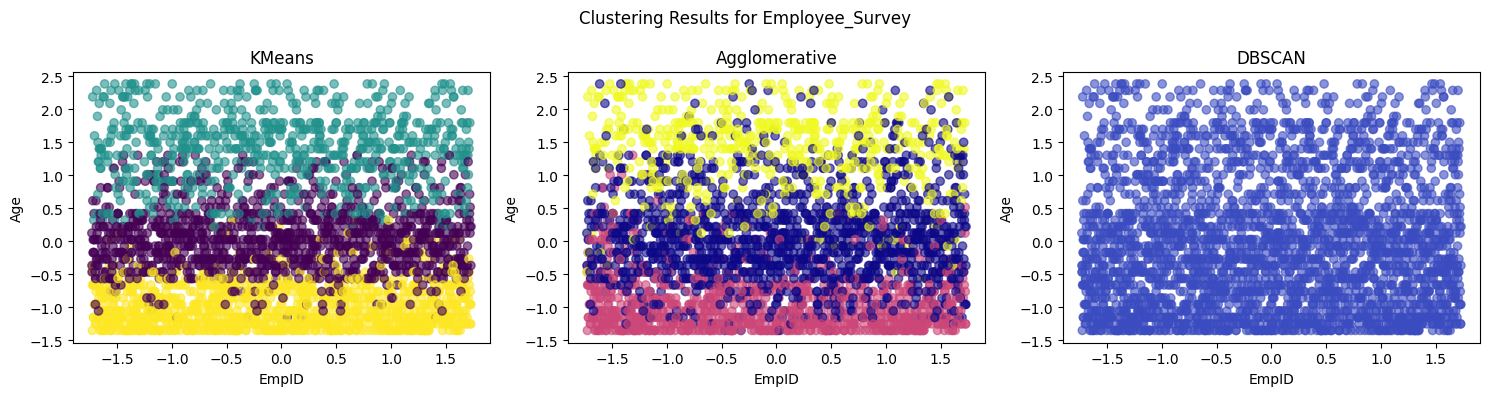

In [28]:
    # Visualize Clustering Results for All Models
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axs[0].set_title('KMeans')
axs[0].set_xlabel(num_df.columns[0])
axs[0].set_ylabel(num_df.columns[1])

axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='plasma', alpha=0.6)
axs[1].set_title('Agglomerative')
axs[1].set_xlabel(num_df.columns[0])
axs[1].set_ylabel(num_df.columns[1])

axs[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=db_labels, cmap='coolwarm', alpha=0.6)
axs[2].set_title('DBSCAN')
axs[2].set_xlabel(num_df.columns[0])
axs[2].set_ylabel(num_df.columns[1])

plt.suptitle(f"Clustering Results for {name}")
plt.tight_layout()
plt.show()

1. KMeans (k=3)

- Tampak tiga “lapisan” horisontal yang sangat tegas—artinya klaster terutama dipisahkan berdasarkan usia, bukan EmpID atau fitur lainnya.

- Klaster bawah (kuning) mewakili karyawan termuda, tengah (ungu) usia menengah, atas (hijau) karyawan tertua.

2. Agglomerative

- Hasil mirip KMeans dengan tiga kelompok usia, tetapi tepi klaster sedikit lebih kabur—tanda minimnya struktur hirarkis selain usia.

- Ada beberapa titik (merah muda/pink) yang menyebrang antar-lapisan, menunjukkan keterhubungan usia yang lebih kontinu.

3. DBSCAN

- Hampir semua titik diwarnai satu sama (navy)—DBSCAN gagal menemukan core points yang cukup padat untuk membentuk klaster terpisah.

- Sekali lagi usia tidak terkonsentrasi dalam zona densitas tertentu, sehingga DBSCAN menandai sebagian besar data sebagai noise atau single cluster besar.

Kesimpulan

- Usia adalah dominan driver klaster—metode partisi (KMeans/Agglomerative) paling berhasil memecah data ke dalam 3 segmen usia.

- EmpID tidak memengaruhi struktur klaster.

- DBSCAN kurang cocok di sini karena distribusi usia relatif merata tanpa “pulau” densitas yang jelas.